In [1]:
import numpy as np #numerical operations
import pandas as pd #data manipulation and analysis
import matplotlib
import matplotlib.pyplot as plt #reating static, animated, and interactive plots.
import cv2, os, random #image processing tasks, interaction with the operating system,Generates random numbers
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import init_notebook_mode, plot, iplot

#____________________________________________________________

import glob # Used for finding file paths based on patterns, e.g., *.jpg
import tensorflow
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator #  Augments image data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.callbacks import ReduceLROnPlateau #reduce the learning rate when training plateaus.
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.model_selection import train_test_split



### Check GPU

In [36]:


train_df = glob.glob("/kaggle/input/dental-dataset-new/Dental-Neural-Network/train/**/*.jpg")
test_df = glob.glob("/kaggle/input/dental-dataset-new/Dental-Neural-Network/test/**/*.jpg")
validation_df = glob.glob("/kaggle/input/dental-dataset-new/Dental-Neural-Network/validation/**/*.jpg")



In [37]:
train_df[:5], test_df[:5]

(['/kaggle/input/dental-dataset-new/Dental-Neural-Network/train/Normal/The-original-radiograph-of-a-mandibular-first-molar-tooth-with-healthy-occlusal-filling_Q320 copy 3.jpg',
  '/kaggle/input/dental-dataset-new/Dental-Neural-Network/train/Normal/The-original-radiograph-of-a-mandibular-first-molar-tooth-with-healthy-occlusal-filling_Q320 copy.jpg',
  '/kaggle/input/dental-dataset-new/Dental-Neural-Network/train/Normal/The-original-radiograph-of-a-mandibular-first-molar-tooth-with-healthy-occlusal-filling_Q320.jpg',
  '/kaggle/input/dental-dataset-new/Dental-Neural-Network/train/Normal/The-original-radiograph-of-a-mandibular-first-molar-tooth-with-healthy-occlusal-filling_Q320 copy 2.jpg',
  '/kaggle/input/dental-dataset-new/Dental-Neural-Network/train/Normal/The-original-radiograph-of-a-mandibular-first-molar-tooth-with-healthy-occlusal-filling_Q320 copy 4.jpg'],
 ['/kaggle/input/dental-dataset-new/Dental-Neural-Network/test/Normal/The-original-radiograph-of-a-mandibular-first-molar-t

#### <span style='background:#4A1810;color:#ffffff;'> How many images are in each dataset? </span>

In [38]:
print("There is {} images in the training dataset".format(len(train_df)))
print("There is {} images in the test dataset".format(len(test_df)))
print("There is {} images in the validation dataset".format(len(validation_df)))

There is 354 images in the training dataset
There is 65 images in the test dataset
There is 39 images in the validation dataset


#### <span style='background:#4A1810;color:#ffffff;'> View the images in X-ray format </span>



NORMAL


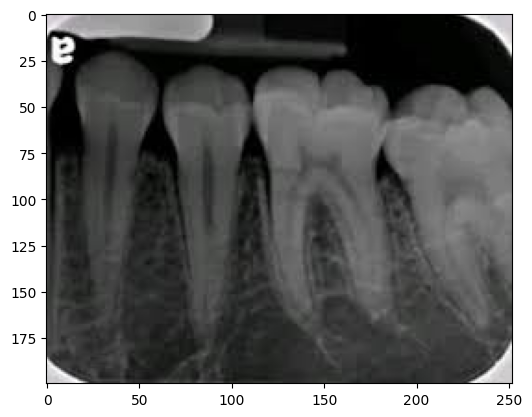

In [39]:
normal_image = load_img("/kaggle/input/dental-dataset-new/Dental-Neural-Network/train/Normal/images (1) copy 5.jpeg")
print("NORMAL")
plt.imshow(normal_image)
plt.show()

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4A1810; font-family:sans-serif;color:#FFFFFF;font-size:130%;text-align:center;border-radius:55px 1px;">Build deep learning models 🔺️</p>

In [40]:
train_dir = "/kaggle/input/dental-dataset-new/Dental-Neural-Network/train/"
test_dir = "/kaggle/input/dental-dataset-new/Dental-Neural-Network/test/"
validation_dir = "/kaggle/input/dental-dataset-new/Dental-Neural-Network/validation/"

In [41]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,  # Normalize pixel values
    horizontal_flip=True,  # Randomly flip images horizontally
    vertical_flip=True,  # Randomly flip images vertically
    rotation_range=30,  # Rotate images by up to 30 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally
    height_shift_range=0.2,  # Randomly shift images vertically
    shear_range=0.3,  # Shear transformation
    zoom_range=0.3,  # Zoom in/out
    channel_shift_range=20.0,  # Randomly shift the color channels
    fill_mode='nearest',  # Fill any newly created pixels after transformations
    brightness_range=[0.5, 1.5]  # Adjust brightness
)


val_test_datagen = ImageDataGenerator(rescale = 1./255)

train_set = train_datagen.flow_from_directory(train_dir, class_mode = "binary", batch_size = 16, target_size = (224, 224))
validation_set = val_test_datagen.flow_from_directory(validation_dir, class_mode = "binary", batch_size = 16, target_size = (224, 224))
test_set = val_test_datagen.flow_from_directory(test_dir, class_mode = "binary", batch_size = 16, target_size = (224, 224))

Found 598 images belonging to 3 classes.
Found 111 images belonging to 3 classes.
Found 182 images belonging to 3 classes.


#### <span style='background:#4A1810;color:#ffffff;'> Build CNN model 🔺️ </span>

## What is a convolutional neural network algorithm?

A convolutional neural network (ConvNet / Convolutional neural networks -CNN) is a deep learning algorithm that can take an input image and separate various aspects/objects in the image. CNN is a network architecture for deep learning that learns directly from data. CNNs are particularly useful for finding patterns in images to recognize objects, classes, and categories. They can also be quite effective for classifying audio, time-series and signal data.

![](https://miro.medium.com/max/1400/1*uAeANQIOQPqWZnnuH-VEyw.jpeg)


## Convolution layer

A convolutional layer is the main building block of a CNN. It contains a set of filters (or kernels) whose parameters will be learned throughout the training. The size of the filters is usually smaller than the actual image. Each filter intertwines with the image and creates an activation map.

![](https://miro.medium.com/max/1400/1*D6iRfzDkz-sEzyjYoVZ73w.gif)


## Convolutional stride

Stride is a parameter of the neural network's filter that modifies the amount of movement over the image or video.

![](https://csdl-images.ieeecomputer.org/trans/si/2020/04/figures/ko1ab-2961602.gif)


## Convolutional padding

Padding is a term relevant to convolutional neural networks as it refers to the amount of pixels added to an image when it is being processed by the kernel of a CNN. For example, if the padding in a CNN is set to zero, then every pixel value that is added will be of value zero.

What does padding ='same' means? In this case, we add 'p' padding layers such that the output image has the same dimensions as the input image. It is called "same" because the output size is the same as the input size (when stride = 1). Using 'same' ensures that the filter is applied to all the elements of the input. Normally, padding is set to "SAME" while training the model.

![](https://miro.medium.com/max/2000/1*WpOcRWlofm0Z0EDUTKefzg.gif)


## Pooling layer

The purpose of the pooling layers is to reduce the dimensions of the hidden layer by combining the outputs of neuron clusters at the previous layer into a single neuron in the next layer.

![](https://nico-curti.github.io/NumPyNet/NumPyNet/images/maxpool.gif)

![](https://miro.medium.com/max/1400/1*fXxDBsJ96FKEtMOa9vNgjA.gif)

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Create the Sequential model
model1 = Sequential()

# Convolutional Neural Networks (CNNs)
model1.add(Conv2D(64, (3, 3), strides=(1, 1), activation="relu", padding="same", input_shape=(224, 224, 3)))  # Increased filters
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(128, (3, 3), strides=(1, 1), padding="same", activation="relu"))  # Increased filters
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.3))  # Increased dropout to prevent overfitting
model1.add(Conv2D(256, (3, 3), strides=(1, 1), padding="same", activation="relu"))  # Increased filters
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(512, (3, 3), strides=(1, 1), padding="same", activation="relu"))  # Increased filters
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.3))  # Increased dropout

# Flatten the output of the convolutional layers
model1.add(Flatten())

# Fully connected layers
model1.add(Dense(256, activation="relu"))  # Increased neurons
model1.add(Dropout(0.4))  # Increased dropout
model1.add(Dense(128, activation="relu"))  # Increased neurons
model1.add(Dense(64, activation="relu"))  # Increased neurons

# Output layer (binary classification)
model1.add(Dense(1, activation="sigmoid"))

# Summary of the model architecture
model1.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │    25,690,368 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,282,561 (104.07 MB)

 Trainable params: 27,282,561 (104.07 MB)

 Non-trainable params: 0 (0.00 B)

#### <span style='background:#4A1810;color:#ffffff;'> Compile the model </span>

In [44]:
model1.compile(optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])
#Root Mean Square Propagation

#### <span style='background:#4A1810;color:#ffffff;'> Train the model </span>

In [45]:


early_stopping_callbacks = tensorflow.keras.callbacks.EarlyStopping(patience = 15,
                                                                    restore_best_weights = True)

In [46]:
history = model1.fit(train_set, epochs=20,
                     validation_data=validation_set,
                     steps_per_epoch=100,
                     callbacks=[early_stopping_callbacks])


Epoch 1/20
  9/100 ━━━━━━━━━━━━━━━━━━━━ 1:02 687ms/step - accuracy: 0.5540 - loss: 2.5343

I0000 00:00:1733595208.459439     111 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_reduce_select_fusion_2', 36 bytes spill stores, 36 bytes spill loads



100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 142ms/step - accuracy: 0.7470 - loss: 1.1362 - val_accuracy: 0.2162 - val_loss: 1.0652
Epoch 2/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.8045 - loss: 0.6514 - val_accuracy: 0.2162 - val_loss: 12.0638
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - accuracy: 0.8045 - loss: 0.6334 - val_accuracy: 0.2162 - val_loss: 1.8935
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 96ms/step - accuracy: 0.8110 - loss: 0.6137 - val_accuracy: 0.2162 - val_loss: 1.3022
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.8042 - loss: 0.6622 - val_accuracy: 0.2162 - val_loss: 0.8629
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.8017 - loss: 0.6215 - val_accuracy: 0.2162 - val_loss: 1.4433
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - accuracy: 0.8030 - loss: 0.5917 - val_accuracy: 0.2162 - val_loss: 1.2009
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.7967 - loss: 0.6790 - val_accu

In [47]:
#scores = model1.evaluate_generator(test_set)
#print("\n%s: %.3f%%" % (model1.metrics_names[0], scores[0]*100))
#print("\n%s: %.3f%%" % (model1.metrics_names[1], scores[1]*100))

test_loss, test_accuracy = model1.evaluate(test_set, steps = 50)
print("The testing accuracy is: ", test_accuracy * 100, "%")


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3958 - loss: 0.5618
The testing accuracy is:  39.56044018268585 %


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[0]


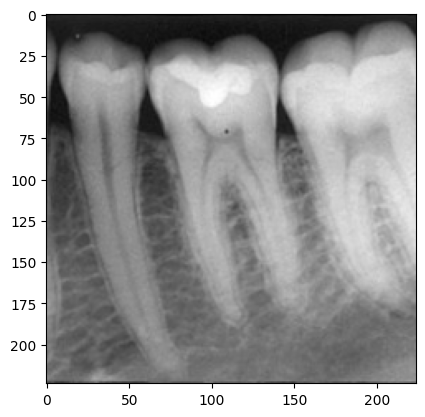

In [52]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt


def predict_class(path):
    img = cv2.imread(path)

    RGBImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    RGBImg= cv2.resize(RGBImg,(224,224))
    plt.imshow(RGBImg)
    image = np.array(RGBImg) / 255.0
    predict=model1.predict(np.array([image]))
    per=np.argmax(predict,axis=1)
    print(per)


predict_class('/kaggle/input/dental-dataset-new/Dental-Neural-Network/validation/Normal/The-original-radiograph-of-a-mandibular-first-molar-tooth-with-healthy-occlusal-filling_Q320 copy 5.jpg')

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4A1810; font-family:sans-serif;color:#FFFFFF;font-size:170%;text-align:center;border-radius:55px 1px;">TRANSFER LEARNING</p>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4A1810; font-family:sans-serif;color:#FFFFFF;font-size:130%;text-align:center;border-radius:55px 1px;">VGG16 model</p>

In [17]:
from tensorflow.keras.applications import EfficientNetB0

# Replace VGG16 with EfficientNetB0
base_model1 = EfficientNetB0(include_top=False, weights="imagenet", input_shape=(224, 224, 3), pooling="max")

# EfficientNetB0 already has pre-trained weights on ImageNet, so there's no need to load weights manually

base_model1.summary()


Exception: URL fetch failure on https://storage.googleapis.com/keras-applications/efficientnetb0_notop.h5: None -- [Errno -3] Temporary failure in name resolution

In [ ]:
model2 = Sequential()
model2.add(base_model1)
model2.add(Flatten())

model2.add(Dense(128, activation = "relu"))
model2.add(Dense(64, activation = "relu"))
model2.add(Dense(32, activation = "relu"))
model2.add(Dense(1, activation = "sigmoid"))

# freeze the layers
for layer in base_model1.layers:
    layer.trainable = False

model2.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
history = model2.fit(train_set, epochs=20, validation_data=validation_set, steps_per_epoch=100,
                     callbacks=[early_stopping_callbacks])


### Evaluate model2 on the test set

In [ ]:
#scores = model1.evaluate_generator(test_set)
#print("\n%s: %.3f%%" % (model1.metrics_names[0], scores[0]*100))
#print("\n%s: %.3f%%" % (model1.metrics_names[1], scores[1]*100))

test_loss, test_accuracy = model2.evaluate(test_set, steps = 50)
print("The testing accuracy is: ", test_accuracy * 100, "%")


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#4A1810; font-family:sans-serif;color:#FFFFFF;font-size:130%;text-align:center;border-radius:55px 1px;">ResNet50V2 model</p>

In [18]:
from tensorflow.keras.applications import EfficientNetB3

# Replace ResNet50V2 with EfficientNetB3
base_model2 = EfficientNetB3(weights="imagenet",  # Use pre-trained weights from ImageNet
                             input_shape=(224, 224, 3),
                             pooling="max",  # Global average pooling
                             include_top=False)  # Exclude the fully connected layers

# Freeze the layers of EfficientNetB3 for transfer learning
for layer in base_model2.layers:
    layer.trainable = False

base_model2.summary()


Exception: URL fetch failure on https://storage.googleapis.com/keras-applications/efficientnetb3_notop.h5: None -- [Errno -3] Temporary failure in name resolution

In [ ]:
model3 = Sequential()
model3.add(base_model2)
model3.add(Flatten())

model3.add(Dense(128, activation = "relu"))
model3.add(Dense(64, activation = "relu"))
model3.add(Dense(32, activation = "relu"))
model3.add(Dense(1, activation = "sigmoid"))

# freeze the layers
for layer in base_model2.layers:
    layer.trainable = False

model3.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
%%time

history = model3.fit(train_set, epochs = 20, validation_data = validation_set, steps_per_epoch = 100,
                              callbacks = [early_stopping_callbacks])

### Visualize performance of model3

In [ ]:
plt.figure(figsize = (10, 5))
plt.title("Model accuracy")
plt.plot(history.history["accuracy"], "go-")
plt.plot(history.history["val_accuracy"], "ro-")
plt.legend(["accuracy", "val_accuracy"])
plt.show()

In [ ]:
plt.figure(figsize = (10, 5))
plt.title("Model loss")
plt.plot(history.history["loss"], "go-")
plt.plot(history.history["val_loss"], "ro-")
plt.legend(["loss", "val_loss"])
plt.show()

### Evaluate model3 on the test set

In [ ]:
#scores = model1.evaluate_generator(test_set)
#print("\n%s: %.3f%%" % (model1.metrics_names[0], scores[0]*100))
#print("\n%s: %.3f%%" % (model1.metrics_names[1], scores[1]*100))

test_loss, test_accuracy = model3.evaluate(test_set, steps = 50)
print("The testing accuracy is: ", test_accuracy * 100, "%")
print("The testing loss is: ", test_loss * 100, "%")